In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('heart.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
df.shape

(1025, 14)

In [45]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
X = df.drop('target', axis=1)
y = df['target']

In [48]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1025, 13)
y shape: (1025,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('X train shape is:', X_train.shape)
print('X test shape is:', X_test.shape)

X train shape is: (820, 13)
X test shape is: (205, 13)


In [50]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy is: {accuracy:.2f}")

Accuracy is: 0.99


In [52]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
param_range = (1, 12)
train_scores, valid_score = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X, y,
    param_name="max_depth",
    param_range=param_range,
    cv=cv,
    scoring="accuracy"
)

In [53]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_score, axis=1)


In [54]:
print("Actual depth of tree:", tree_clf.get_depth())


Actual depth of tree: 10


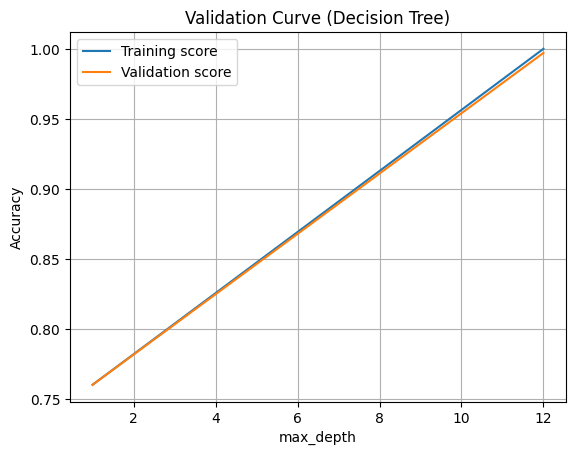

In [55]:
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, valid_scores_mean, label="Validation score")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()

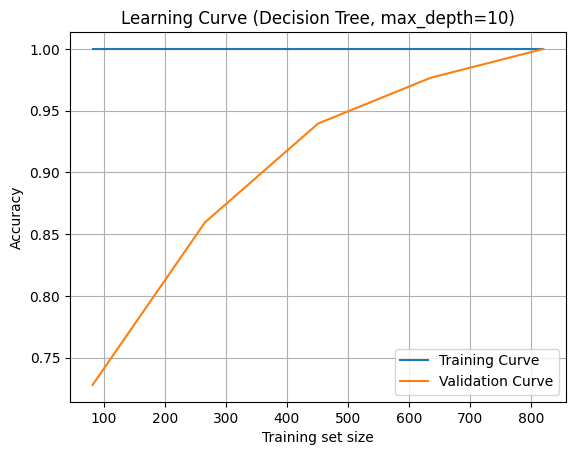

In [59]:
train_sizes_2, train_scores_2, valid_scores_2 = learning_curve(
    DecisionTreeClassifier(max_depth=12, random_state=42),
    X, y,
    train_sizes=np.linspace(0.1, 1, 5),
    cv=5,
    scoring="accuracy"
)

train_scores_2_mean = np.mean(train_scores_2, axis=1)
valid_scores_2_mean = np.mean(valid_scores_2, axis=1)

plt.plot(train_sizes_2, train_scores_2_mean, label="Training Curve")
plt.plot(train_sizes_2, valid_scores_2_mean, label="Validation Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Decision Tree, max_depth=10)")
plt.legend()
plt.grid(True)
plt.show()

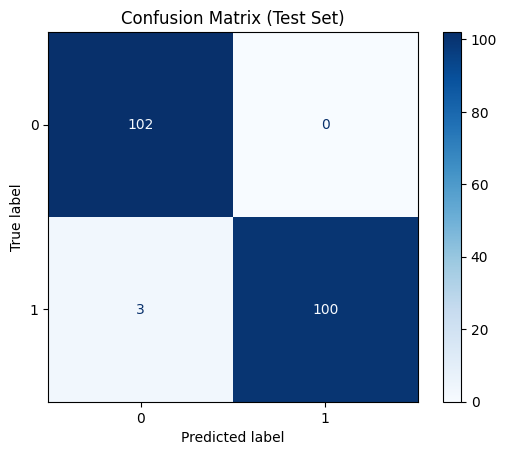

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.grid(False)
plt.show()